Silhouette Score: 0.34571775074615757


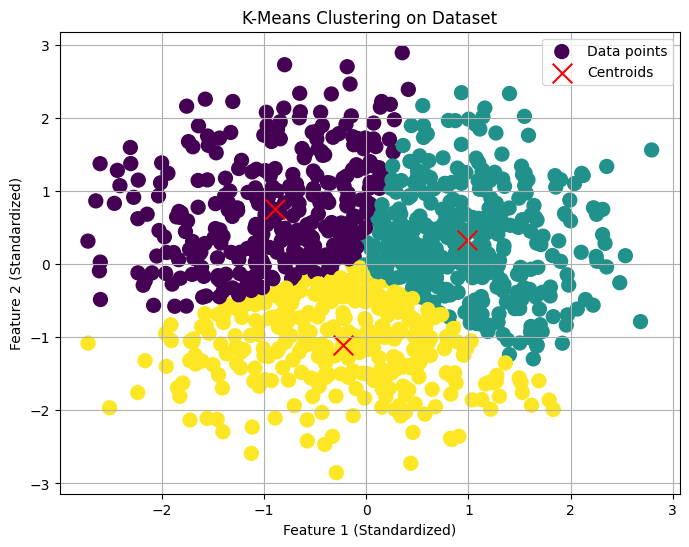

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("MOCK_DATA.csv")

# Data Cleaning
# Check for and handle missing values
# Encode categorical features
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['customer_type'] = le.fit_transform(df['customer_type'])
col = ['age', 'income', 'purchase_history', 'customer_spending_score', 'freq_of_visit', 'gender', 'region', 'customer_type']
imputer = SimpleImputer(strategy='mean')
df[col] = imputer.fit_transform(df[col])


# Feature Selection
X = df[col].values

# Standardize the dataset
scaler = StandardScaler()  # Changed to StandardScaler
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Get the cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Evaluate clustering performance
silhouette_avg = silhouette_score(X_pca, labels)
print("Silhouette Score:", silhouette_avg)

# Visualize the clustered data
plt.figure(figsize=(8, 6))

# Scatter plot of the data points colored by cluster label
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', s=100, label="Data points")

# Plot the centroids on the same plot
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label="Centroids")

# Adding title and labels
plt.title('K-Means Clustering on Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


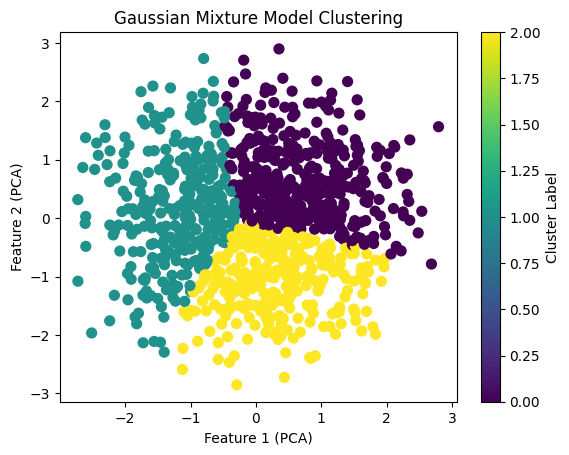

Silhouette Score: 0.3370814984356547


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("MOCK_DATA.csv")

# Data Preprocessing
# Encode categorical features
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['customer_type'] = le.fit_transform(df['customer_type'])

# Check and handle missing values if necessary
# Example: df.fillna(df.mean(), inplace=True) # Uncomment if missing values are present

# Feature Selection
col = ['age', 'income', 'purchase_history', 'customer_spending_score', 'freq_of_visit', 'gender', 'region', 'customer_type']
X = df[col].values

# Scaling the dataset
scaler = StandardScaler()  # Consider using StandardScaler as an alternative
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

# Define function to plot clusters
def plot_clusters(X, labels, algorithm_name):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.title(f'{algorithm_name} Clustering')
    plt.xlabel('Feature 1 (PCA)')
    plt.ylabel('Feature 2 (PCA)')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Plot the clusters
plot_clusters(X_pca, gmm_labels, 'Gaussian Mixture Model')

# Evaluate clustering performance
score = silhouette_score(X_pca, gmm_labels)
print("Silhouette Score:", score)


Number of clusters (including noise): 4


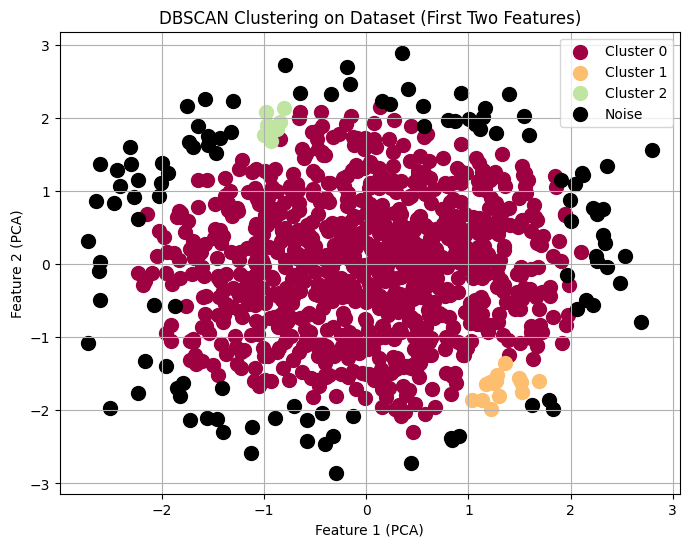

Silhouette Score cannot be computed for a single cluster or noise-only clustering.


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("MOCK_DATA.csv")

# Data Preprocessing
# Encode categorical features
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['customer_type'] = le.fit_transform(df['customer_type'])

# Feature selection
col = ['age', 'income', 'purchase_history', 'customer_spending_score', 'freq_of_visit', 'gender', 'region', 'customer_type']
X = df[col].values

# Scaling the dataset
scaler = StandardScaler()  # StandardScaler is also an option, depending on the data
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X_pca)

# Get the labels assigned by DBSCAN
labels = dbscan.labels_

# Check the number of unique labels (clusters)
unique_labels = set(labels)
print(f"Number of clusters (including noise): {len(unique_labels)}")

# Visualize the clustered data
plt.figure(figsize=(8, 6))

# Scatter plot of the data points colored by cluster label
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X_pca[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=100, label=f"Cluster {k}" if k != -1 else "Noise")

# Adding title and labels
plt.title('DBSCAN Clustering on Dataset (First Two Features)')
plt.xlabel('Feature 1 (PCA)')
plt.ylabel('Feature 2 (PCA)')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

# Evaluate clustering performance
if len(unique_labels) > 1 and -1 not in unique_labels:
    score = silhouette_score(X_pca, labels)
    print("Silhouette Score:", score)
else:
    print("Silhouette Score cannot be computed for a single cluster or noise-only clustering.")


OPTICS - MinMax

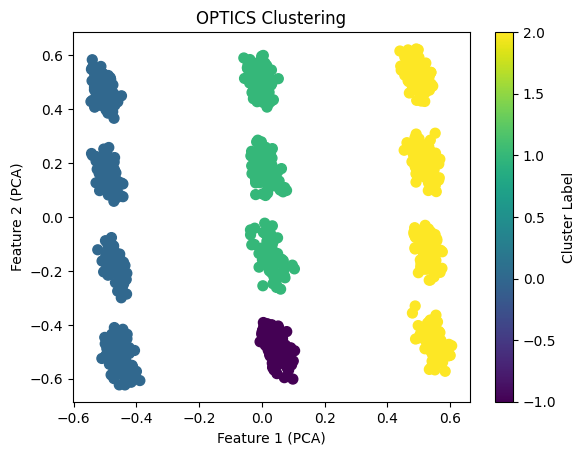

Silhouette Score: 0.32399082209268426


In [45]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("MOCK_DATA.csv")

# Data Preprocessing
# Encode categorical features
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['customer_type'] = le.fit_transform(df['customer_type'])

# Check and handle missing values if necessary
# Example: df.fillna(df.mean(), inplace=True) # Uncomment if missing values are present

# Feature Selection
col = ['age', 'income', 'purchase_history', 'customer_spending_score', 'freq_of_visit', 'gender', 'region', 'customer_type']
X = df[col].values

# Scaling the dataset
scaler = MinMaxScaler()  # StandardScaler often works well for distance-based algorithms
# scaler = StandardScaler()  # StandardScaler often works well for distance-based algorithms
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply OPTICS Clustering
optics = OPTICS(min_samples=10, xi=0.02, min_cluster_size=0.25)
optics.fit(X_pca)

# Get the labels assigned by OPTICS
optics_labels = optics.labels_

# Define function to plot clusters
def plot_clusters(X, labels, algorithm_name):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.title(f'{algorithm_name} Clustering')
    plt.xlabel('Feature 1 (PCA)')
    plt.ylabel('Feature 2 (PCA)')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Plot the clusters
plot_clusters(X_pca, optics_labels, 'OPTICS')

# Evaluate clustering performance
score = silhouette_score(X_pca, optics_labels)
print("Silhouette Score:", score)

OPTICS - Standard Scaling

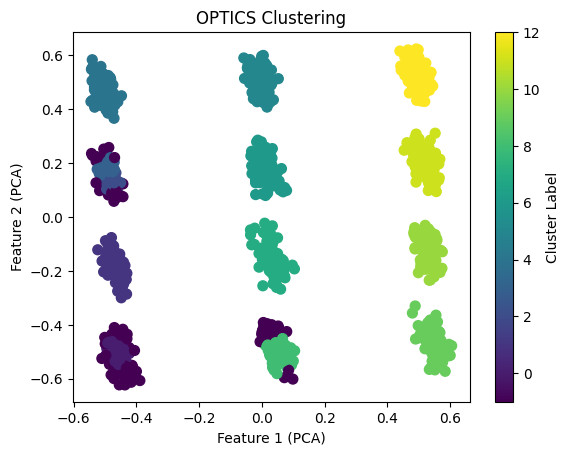

Silhouette Score: 0.5974996811817012


In [51]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("MOCK_DATA.csv")

# Data Preprocessing
# Encode categorical features
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['customer_type'] = le.fit_transform(df['customer_type'])

# Check and handle missing values if necessary
# Example: df.fillna(df.mean(), inplace=True) # Uncomment if missing values are present

# Feature Selection
col = ['age', 'income', 'purchase_history', 'customer_spending_score', 'freq_of_visit', 'gender', 'region', 'customer_type']
X = df[col].values

# Scaling the dataset
scaler = MinMaxScaler()  # StandardScaler often works well for distance-based algorithms
# scaler = StandardScaler()  # StandardScaler often works well for distance-based algorithms
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply OPTICS Clustering
# optics = OPTICS(min_samples=10, xi=0.02, min_cluster_size=0.25)
optics = OPTICS(min_samples=20, xi=0.01, min_cluster_size=0.03)
optics.fit(X_pca)

# Get the labels assigned by OPTICS
optics_labels = optics.labels_

# Define function to plot clusters
def plot_clusters(X, labels, algorithm_name):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.title(f'{algorithm_name} Clustering')
    plt.xlabel('Feature 1 (PCA)')
    plt.ylabel('Feature 2 (PCA)')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Plot the clusters
plot_clusters(X_pca, optics_labels, 'OPTICS')

# Evaluate clustering performance
score = silhouette_score(X_pca, optics_labels)
print("Silhouette Score:", score)